a. Read the selected data, list the fields/variables, and identify their types.

In [21]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'Fifa 23 Players Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
display(data.head())

# Display information about the DataFrame, including data types
display(data.info())


,Known As,Full Name,Overall,Potential,Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value(in Euro)
0,L. Messi,Lionel Messi,91,91,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,88,91,67,66,67,62,53,62,22,54000000
1,K. Benzema,Karim Benzema,91,91,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,84,89,67,67,67,63,58,63,21,64000000
2,R. Lewandowski,Robert Lewandowski,91,91,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,83,86,67,69,67,64,63,64,22,84000000
3,K. De Bruyne,Kevin De Bruyne,91,91,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,91,91,82,82,82,78,72,78,24,107500000
4,K. Mbappé,Kylian Mbappé,91,95,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,84,92,70,66,70,66,57,66,21,190500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Positions Played             18539 non-null  object
 5   Best Position                18539 non-null  object
 6   Nationality                  18539 non-null  object
 7   Image Link                   18539 non-null  object
 8   Age                          18539 non-null  int64 
 9   Height(in cm)                18539 non-null  int64 
 10  Weight(in kg)                18539 non-null  int64 
 11  TotalStats                   18539 non-null  int64 
 12  BaseStats                    18539 non-null  int64 
 13  Club Name                    18

None

b. List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the 
missing data, and remove the outliers.
Note: If your data does not have inconsistencies, missing observations, or outliers, it is 
suggested to create them manually and apply methods to show your skills.

In [2]:
# Check for inconsistencies in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    display(data[column].value_counts())
    print("\n")
# Check for missing data
missing_data = data.isnull().sum()
display(missing_data[missing_data > 0])
# Identify outliers using IQR method for numerical columns
import numpy as np

numerical_columns = data.select_dtypes(include=['int64']).columns
for column in numerical_columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    display(f"Column: {column}, Number of outliers: {len(outliers)}")


Column: Known As


A. Rodríguez    7
J. Taylor       7
M. Camara       7
J. Brown        7
G. Singh        6
               ..
L. Krajnc       1
A. Le Fondre    1
A. Tuia         1
E. Ólafsson     1
N. Rabha        1
Name: Known As, Length: 17530, dtype: int64



Column: Full Name


Tom Davies                3
Diego Rodríguez           3
Emmanuel Boateng          3
Liam Kelly                3
Adama Traoré              3
                         ..
Konrad Michalak           1
Cristian Herrera Pérez    1
Mikkel Rygaard            1
Leonel Galeano            1
Nabin Rabha               1
Name: Full Name, Length: 18337, dtype: int64



Column: Positions Played


CB            2433
GK            2061
ST            1719
CDM,CM         953
CM             732
              ... 
LM,CF,ST         1
CAM,CM,LWB       1
LB,LM,RB         1
CM,RW,CDM        1
CM,CF,CDM        1
Name: Positions Played, Length: 693, dtype: int64



Column: Best Position


CB     3658
ST     2565
CAM    2311
GK     2061
RM     1443
CDM    1403
CM     1104
RB      925
LB      864
LM      797
RWB     422
LWB     404
RW      297
LW      215
CF       70
Name: Best Position, dtype: int64



Column: Nationality


England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: Nationality, Length: 160, dtype: int64



Column: Image Link


https://cdn.sofifa.net/players/258/208/23_60.png    2
https://cdn.sofifa.net/players/231/044/23_60.png    2
https://cdn.sofifa.net/players/227/785/23_60.png    2
https://cdn.sofifa.net/players/242/336/23_60.png    2
https://cdn.sofifa.net/players/235/210/23_60.png    2
                                                   ..
https://cdn.sofifa.net/players/220/663/23_60.png    1
https://cdn.sofifa.net/players/223/223/23_60.png    1
https://cdn.sofifa.net/players/229/879/23_60.png    1
https://cdn.sofifa.net/players/236/535/23_60.png    1
https://cdn.sofifa.net/players/261/424/23_60.png    1
Name: Image Link, Length: 18420, dtype: int64



Column: Club Name


Free agent                 92
Olympique de Marseille     35
Wolverhampton Wanderers    34
RC Celta de Vigo           34
Real Madrid CF             34
                           ..
Club Sol de América        19
Guaireña FC                19
Independiente Petrolero    19
Delfín Sporting Club       19
9 de Octubre               18
Name: Club Name, Length: 679, dtype: int64



Column: Club Position


SUB    8053
RES    2955
CB     1555
CM      993
ST      878
GK      673
CDM     627
LB      486
RB      485
RM      384
LM      380
CAM     270
RW      186
LW      186
LWB     137
RWB     135
-        92
RF       28
LF       25
CF       11
Name: Club Position, dtype: int64



Column: Contract Until


2023    6796
2024    4467
2025    2968
2022    2372
2026    1204
2027     611
-         92
2028      25
2031       2
2032       2
Name: Contract Until, dtype: int64



Column: Club Jersey Number


8     600
7     599
11    593
4     586
6     586
     ... 
83      6
65      5
86      5
68      5
69      5
Name: Club Jersey Number, Length: 100, dtype: int64



Column: On Loan


-       17310
TRUE     1229
Name: On Loan, dtype: int64



Column: Preferred Foot


Right    14045
Left      4494
Name: Preferred Foot, dtype: int64



Column: National Team Name


-                      17722
Czech Republic            28
Morocco                   26
Mexico                    25
Scotland                  25
Ghana                     24
Austria                   24
Ukraine                   24
Croatia                   24
United States             24
Republic of Ireland       24
Canada                    23
Wales                     23
Qatar                     23
New Zealand               23
Romania                   23
Finland                   23
China PR                  23
Brazil                    23
Argentina                 23
France                    23
Hungary                   23
Spain                     23
Italy                     23
England                   23
Netherlands               23
Portugal                  23
Germany                   23
Belgium                   23
Poland                    23
Iceland                   23
Norway                    22
Sweden                    22
Northern Ireland          22
Australia     



Column: National Team Image Link


-                                          3419
https://cdn.sofifa.net/flags/gb-eng.png    1632
https://cdn.sofifa.net/flags/de.png        1204
https://cdn.sofifa.net/flags/es.png        1074
https://cdn.sofifa.net/flags/fr.png         963
https://cdn.sofifa.net/flags/ar.png         937
https://cdn.sofifa.net/flags/br.png         728
https://cdn.sofifa.net/flags/it.png         623
https://cdn.sofifa.net/flags/us.png         437
https://cdn.sofifa.net/flags/nl.png         428
https://cdn.sofifa.net/flags/pl.png         390
https://cdn.sofifa.net/flags/se.png         390
https://cdn.sofifa.net/flags/pt.png         382
https://cdn.sofifa.net/flags/no.png         373
https://cdn.sofifa.net/flags/ro.png         341
https://cdn.sofifa.net/flags/sa.png         331
https://cdn.sofifa.net/flags/dk.png         318
https://cdn.sofifa.net/flags/be.png         318
https://cdn.sofifa.net/flags/co.png         298
https://cdn.sofifa.net/flags/at.png         289
https://cdn.sofifa.net/flags/tr.png     



Column: National Team Position


-      17722
SUB      431
CB        82
CM        59
ST        40
GK        36
CDM       29
LB        23
RB        23
LW        18
RW        18
LM        12
CAM       11
RM        11
LWB        9
RWB        9
RF         3
LF         3
Name: National Team Position, dtype: int64



Column: National Team Jersey Number


-     17722
23       38
8        37
12       37
10       36
1        36
11       36
14       35
4        35
13       35
15       35
22       35
16       35
17       35
18       34
3        34
19       34
20       34
21       34
6        34
9        34
2        33
5        33
7        33
26        5
24        5
25        3
28        1
27        1
Name: National Team Jersey Number, dtype: int64



Column: Attacking Work Rate


Medium    12204
High       5462
Low         873
Name: Attacking Work Rate, dtype: int64



Column: Defensive Work Rate


Medium    13613
High       3377
Low        1549
Name: Defensive Work Rate, dtype: int64

Series([], dtype: int64)

'Column: Overall, Number of outliers: 292'

'Column: Potential, Number of outliers: 159'

'Column: Age, Number of outliers: 3'

'Column: Height(in cm), Number of outliers: 103'

'Column: Weight(in kg), Number of outliers: 66'

'Column: TotalStats, Number of outliers: 846'

'Column: BaseStats, Number of outliers: 75'

'Column: Wage(in Euro), Number of outliers: 2228'

'Column: Release Clause, Number of outliers: 2179'

'Column: Joined On, Number of outliers: 936'

'Column: Weak Foot Rating, Number of outliers: 7059'

'Column: Skill Moves, Number of outliers: 52'

'Column: International Reputation, Number of outliers: 1214'

'Column: Pace Total, Number of outliers: 423'

'Column: Shooting Total, Number of outliers: 0'

'Column: Passing Total, Number of outliers: 163'

'Column: Dribbling Total, Number of outliers: 541'

'Column: Defending Total, Number of outliers: 0'

'Column: Physicality Total, Number of outliers: 45'

'Column: Crossing, Number of outliers: 0'

'Column: Finishing, Number of outliers: 0'

'Column: Heading Accuracy, Number of outliers: 1194'

'Column: Short Passing, Number of outliers: 1882'

'Column: Volleys, Number of outliers: 0'

'Column: Dribbling, Number of outliers: 2145'

'Column: Curve, Number of outliers: 0'

'Column: Freekick Accuracy, Number of outliers: 4'

'Column: LongPassing, Number of outliers: 181'

'Column: BallControl, Number of outliers: 2089'

'Column: Acceleration, Number of outliers: 650'

'Column: Sprint Speed, Number of outliers: 620'

'Column: Agility, Number of outliers: 257'

'Column: Reactions, Number of outliers: 324'

'Column: Balance, Number of outliers: 345'

'Column: Shot Power, Number of outliers: 0'

'Column: Jumping, Number of outliers: 167'

'Column: Stamina, Number of outliers: 1085'

'Column: Strength, Number of outliers: 104'

'Column: Long Shots, Number of outliers: 0'

'Column: Aggression, Number of outliers: 3'

'Column: Interceptions, Number of outliers: 0'

'Column: Positioning, Number of outliers: 12'

'Column: Vision, Number of outliers: 39'

'Column: Penalties, Number of outliers: 6'

'Column: Composure, Number of outliers: 397'

'Column: Marking, Number of outliers: 0'

'Column: Standing Tackle, Number of outliers: 0'

'Column: Sliding Tackle, Number of outliers: 0'

'Column: Goalkeeper Diving, Number of outliers: 2065'

'Column: Goalkeeper Handling, Number of outliers: 2065'

'Column:  GoalkeeperKicking, Number of outliers: 2067'

'Column: Goalkeeper Positioning, Number of outliers: 2064'

'Column: Goalkeeper Reflexes, Number of outliers: 2066'

'Column: ST Rating, Number of outliers: 1264'

'Column: LW Rating, Number of outliers: 1667'

'Column: LF Rating, Number of outliers: 1459'

'Column: CF Rating, Number of outliers: 1459'

'Column: RF Rating, Number of outliers: 1459'

'Column: RW Rating, Number of outliers: 1667'

'Column: CAM Rating, Number of outliers: 1349'

'Column: LM Rating, Number of outliers: 1969'

'Column: CM Rating, Number of outliers: 1756'

'Column: RM Rating, Number of outliers: 1969'

'Column: LWB Rating, Number of outliers: 1590'

'Column: CDM Rating, Number of outliers: 55'

'Column: RWB Rating, Number of outliers: 1590'

'Column: LB Rating, Number of outliers: 1042'

'Column: CB Rating, Number of outliers: 0'

'Column: RB Rating, Number of outliers: 1042'

'Column: GK Rating, Number of outliers: 2081'

'Column: Value(in Euro), Number of outliers: 2170'

In [3]:
"""From the summery of the data we optain that : 

1- The most player in the world are playing in Positions "CB" by 2433 players as primary Positions
2- the Best Position is CB by 3658 players 
3-The most football player in the world are from England by 1632 players
4- The lowest country of player are Barbados,Kazakhstan,Liechtenstein and Bermuda by 1 player
5- The number of Free agent in 2023 were 92
6-The clubs with the most deals in 2023 are Wolverhampton,Celta de Vigo and Real Madrid by 34 deals
7- Their are 14045 players prefere to play by Right foot and 4494 by Left foot 
8-The most country have players play in National Team league is Czech Republic by28players
and the least is Denmark by 21 players
"""

'From the summery of the data we optain that : \n\n1- The most player in the world are playing in Positions "CB" by 2433 players as primary Positions\n2- the Best Position is CB by 3658 players \n3-The most football player in the world are from England by 1632 players\n4- The lowest country of player are Barbados,Kazakhstan,Liechtenstein and Bermuda by 1 player\n5- The number of Free agent in 2023 were 92\n6-The clubs with the most deals in 2023 are Wolverhampton,Celta de Vigo and Real Madrid by 34 deals\n7- Their are 14045 players prefere to play by Right foot and 4494 by Left foot \n8-The most country have players play in National Team league is Czech Republic by28players\nand the least is Denmark by 21 players\n'

Standardize names in the "Known As" column.<br>
Split combined positions in the "Positions Played" column.<br>
Handle missing or undefined values in the "Club Position," "Contract Until," and "On Loan" columns.<br>
Check and possibly remove duplicates in the "Club Jersey Number" column.<br>
Decide how to handle outliers in numerical columns.

In [4]:
# Standardize names
data['Known As'] = data['Known As'].str.strip().str.title()
# Split combined positions
data['Positions Played'] = data['Positions Played'].str.split(',')
data['Positions Played'] = data['Positions Played'].apply(lambda x: [pos.strip() for pos in x])
# Replace "-" with NaN
data['Club Position'].replace('-', np.nan, inplace=True)
# Replace "-" with NaN
data['Contract Until'].replace('-', np.nan, inplace=True)
# Replace "-" with NaN
data['On Loan'].replace('-', np.nan, inplace=True)
# Check for duplicates in the Club Jersey Number column
duplicates = data[data.duplicated(subset='Club Jersey Number')]
# Handle duplicates if necessary
# data.drop_duplicates(subset='Club Jersey Number', keep='first', inplace=True)
from scipy.stats import zscore

# List of numeric columns with outliers
numeric_columns = ['Overall', 'Potential', 'Value(in Euro)', 'Age', 'Height(in cm)', 'Weight(in kg)',
                    'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause', 'Joined On',
                    'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'Pace Total',
                    'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total',
                    'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing',
                    'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
                    'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
                    'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions',
                    'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle',
                    'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling',
                    'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'LW Rating',
                    'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 'LM Rating',
                    'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating',
                    'CB Rating', 'RB Rating', 'GK Rating']

# Remove outliers using z-scores
data[numeric_columns] = data[numeric_columns].apply(zscore)
data = data[(np.abs(data[numeric_columns]) < 3).all(axis=1)]


3-a. Run the exploratory data analysis:<br>
i. Find the statistical summaries.

In [5]:
# Display basic statistical summaries for the 'data' variable
summary_stats = data.describe()
display(summary_stats)


,Overall,Potential,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value(in Euro)
count,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,...,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000
mean,-0.099842,-0.064105,-0.082249,-0.080276,-0.084860,0.080328,-0.068496,-0.137004,-0.131380,0.116646,...,0.096386,0.112337,0.107494,0.087416,0.107494,0.104068,0.083957,0.104068,-0.191828,-0.136685
std,0.889667,0.926903,0.952880,0.962348,0.948900,0.852638,0.908394,0.482621,0.374313,0.768033,...,0.821003,0.815734,0.838440,0.863528,0.838440,0.851953,0.890842,0.851953,0.673412,0.376295
min,-2.777191,-2.909340,-1.958530,-2.996661,-2.876478,-2.962131,-2.850220,-0.453470,-0.346361,-2.610222,...,-2.913564,-2.892118,-2.825309,-2.662130,-2.825309,-2.729714,-2.477574,-2.729714,-0.877461,-0.376620
25%,-0.714779,-0.648613,-0.898767,-0.809407,-0.737716,-0.355532,-0.705228,-0.402083,-0.299400,-0.178689,...,-0.256178,-0.175260,-0.236025,-0.427383,-0.236025,-0.328429,-0.510609,-0.328429,-0.414146,-0.311131
50%,-0.125519,-0.164172,-0.262909,-0.080322,-0.024796,0.175306,-0.049113,-0.299308,-0.244123,0.307617,...,0.199374,0.253717,0.267446,0.221414,0.267446,0.307206,0.303307,0.307206,-0.347958,-0.252191
75%,0.463742,0.643230,0.584902,0.648763,0.545541,0.654891,0.556531,-0.145146,-0.135069,0.793924,...,0.654926,0.611199,0.698994,0.726034,0.698994,0.660336,0.778092,0.660336,-0.281770,-0.140861
max,2.526153,2.742476,2.916381,2.981835,2.969470,2.177848,2.751994,2.938101,2.959336,0.793924,...,1.945656,1.755139,1.921711,1.951541,1.921711,1.931604,1.931140,1.931604,2.961433,2.963296


ii. Make univariate graphs (i.e., graphs based on single variable).

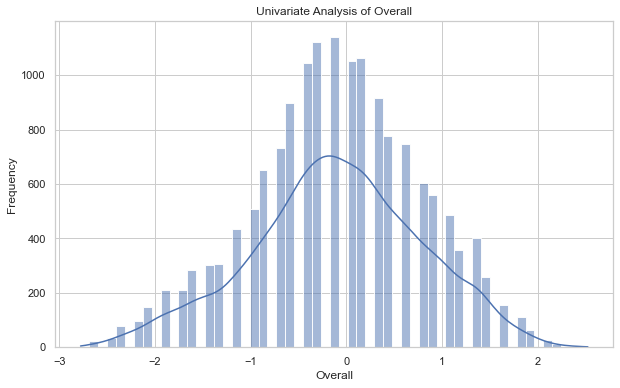

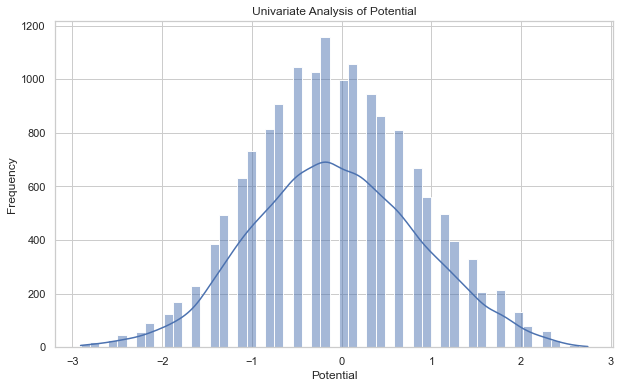

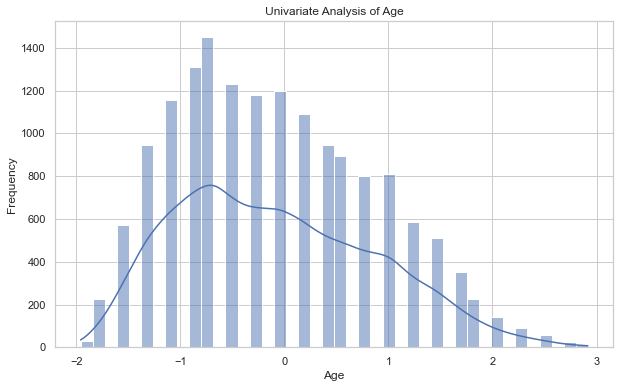

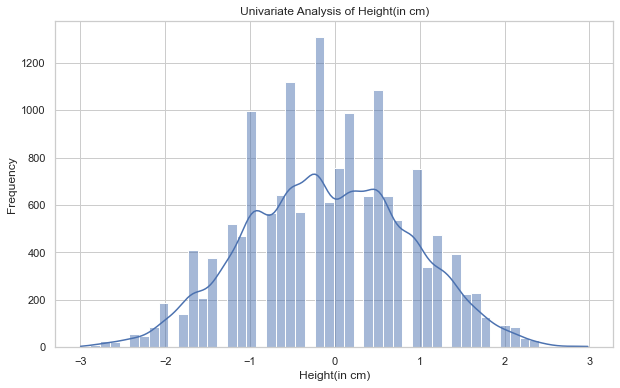

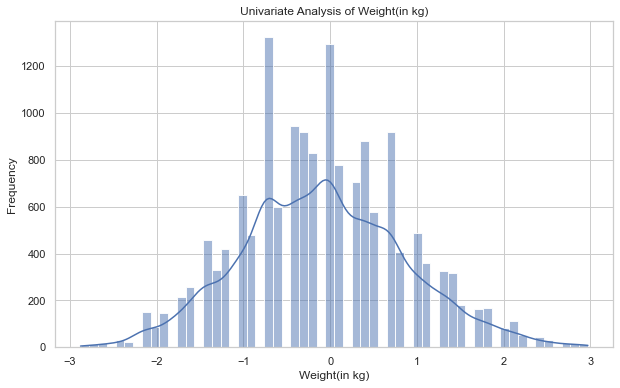

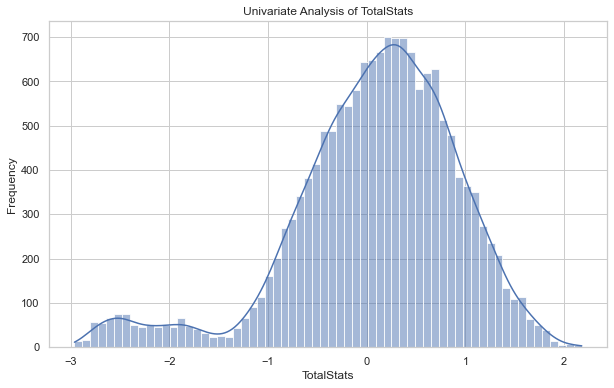

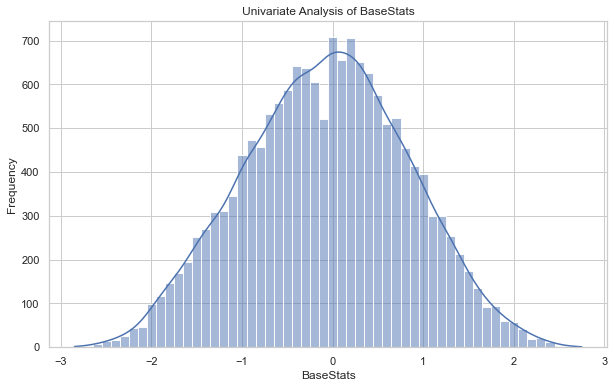

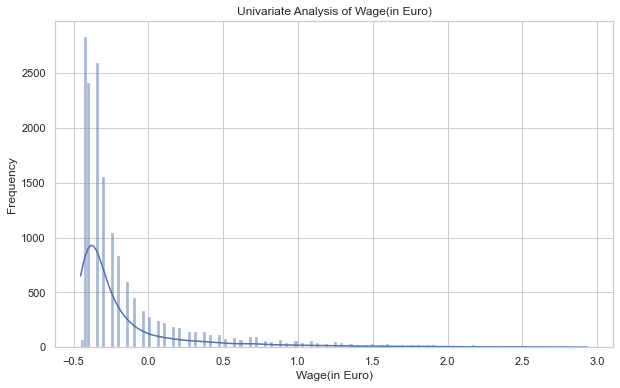

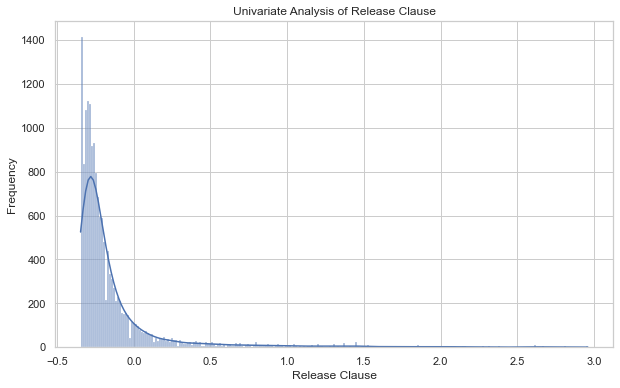

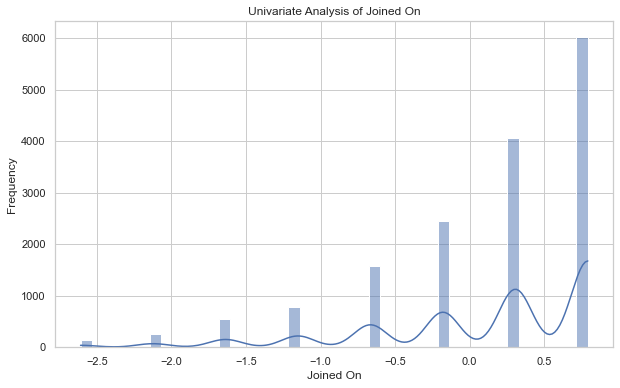

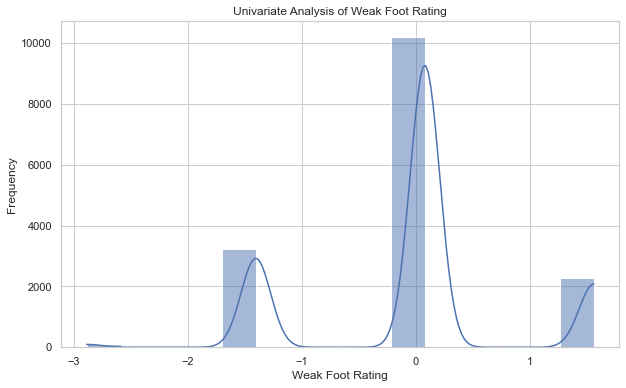

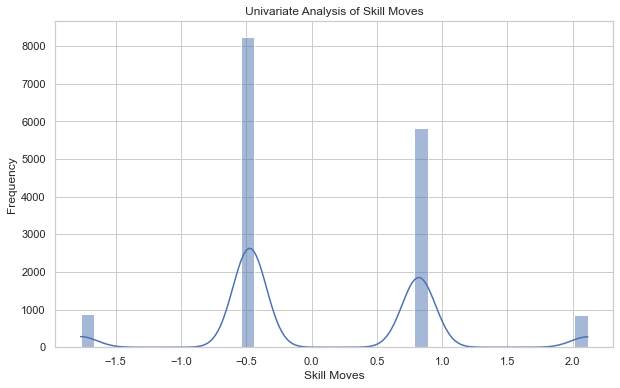

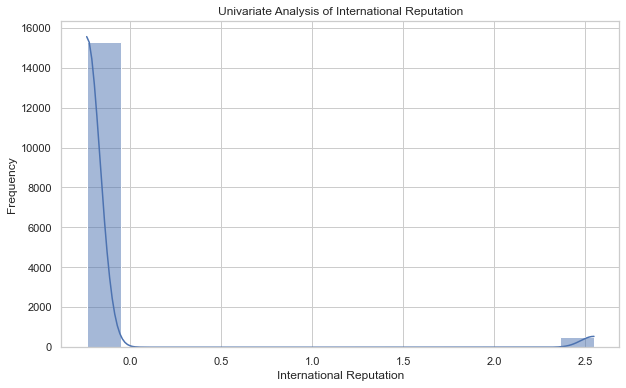

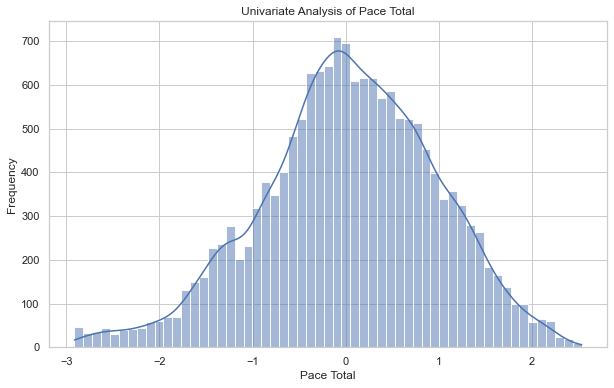

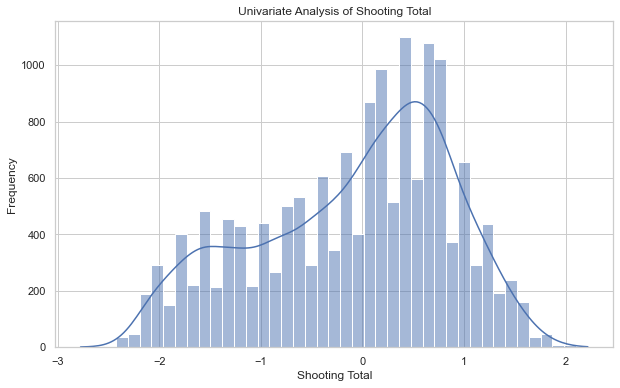

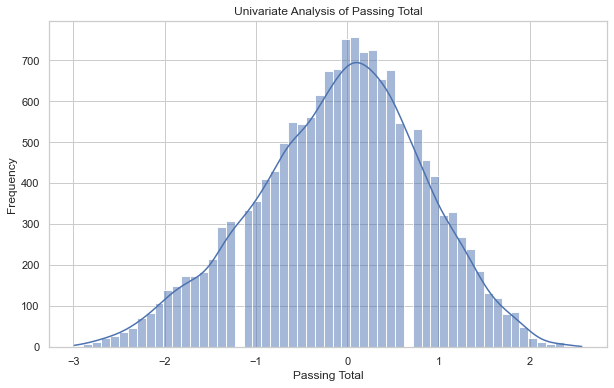

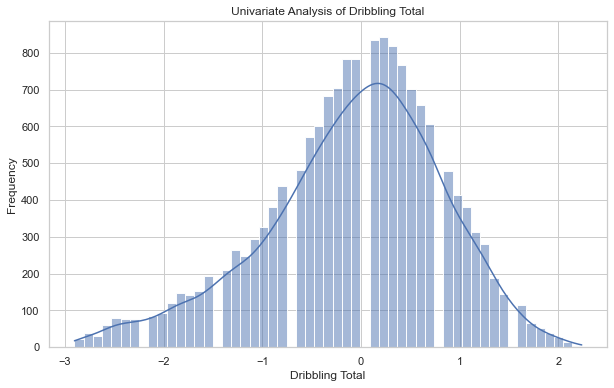

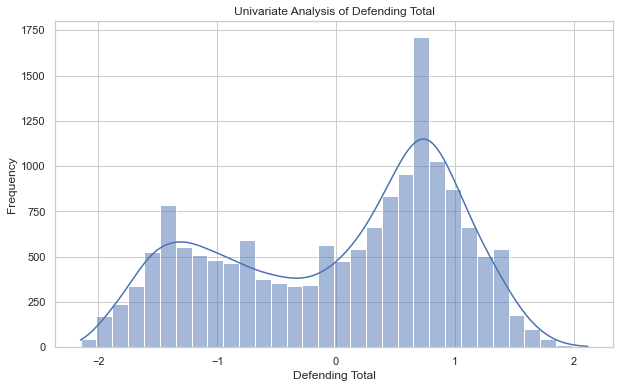

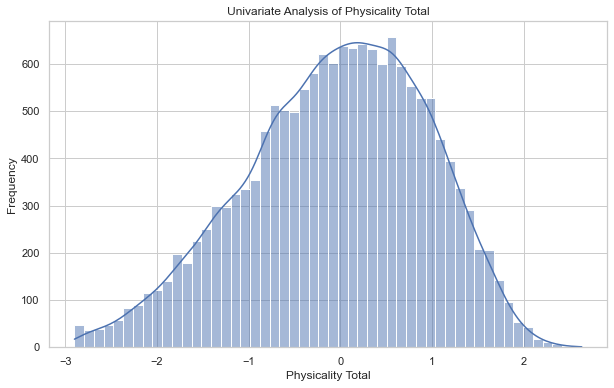

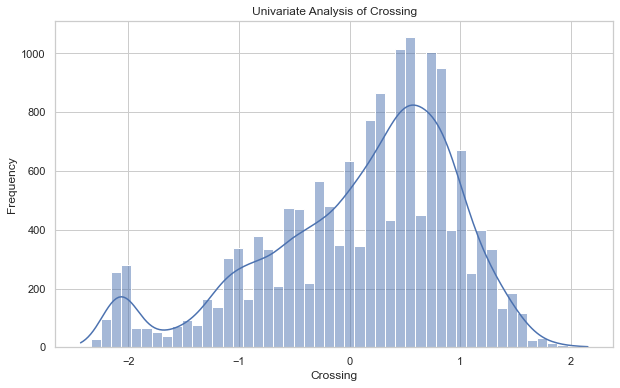

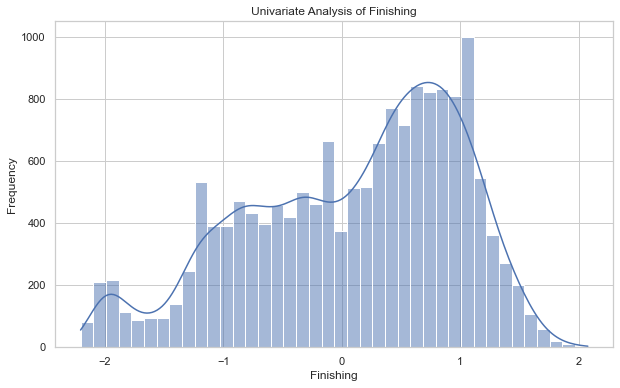

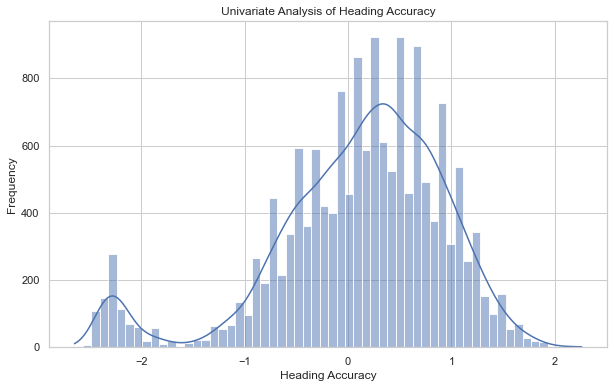

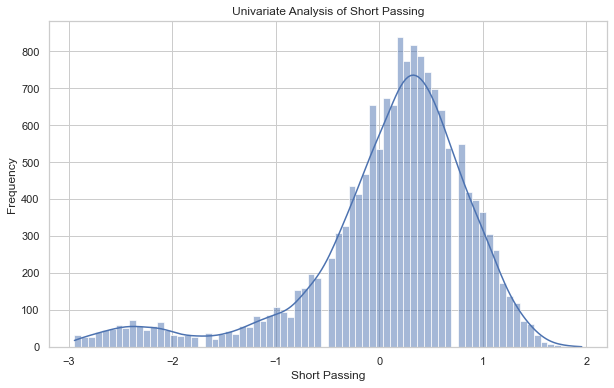

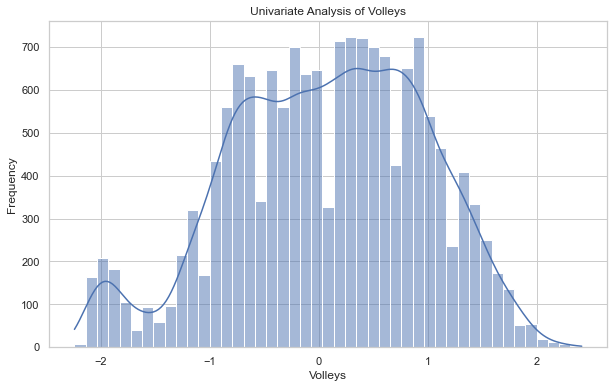

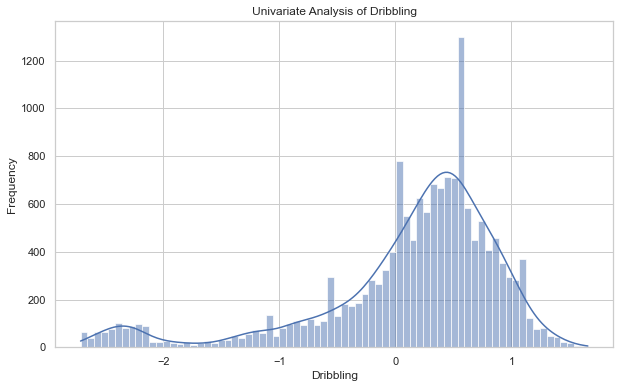

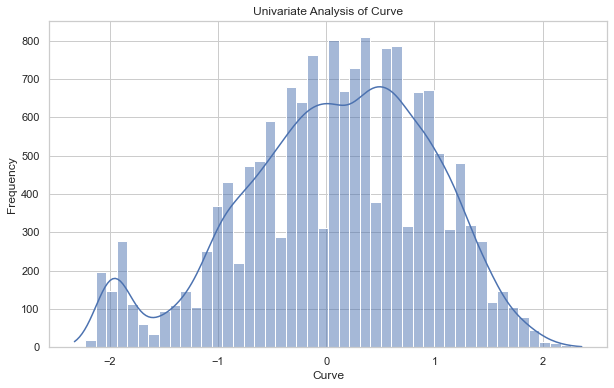

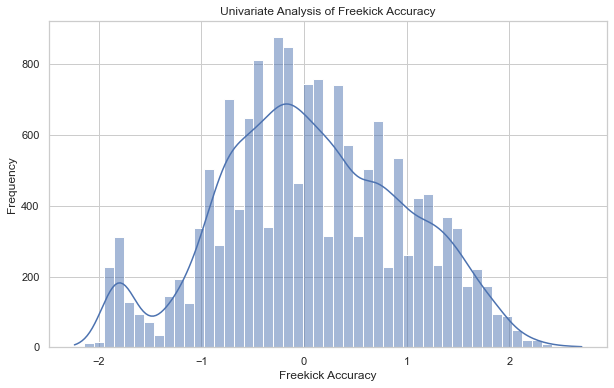

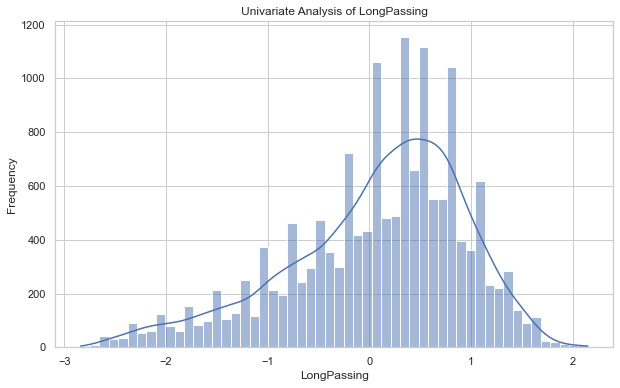

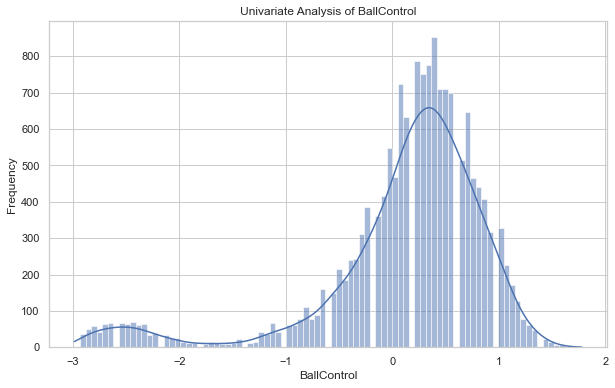

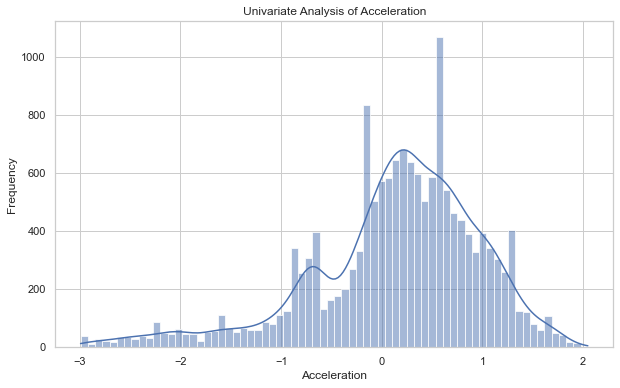

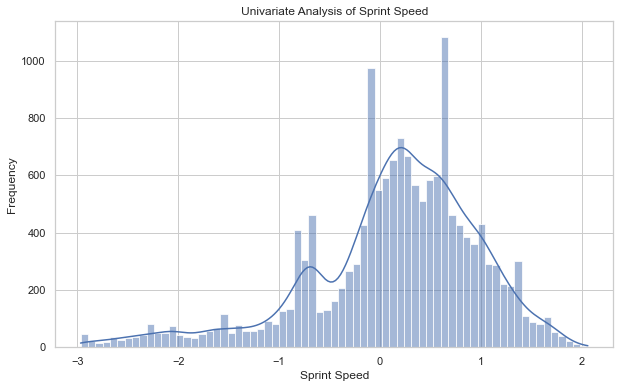

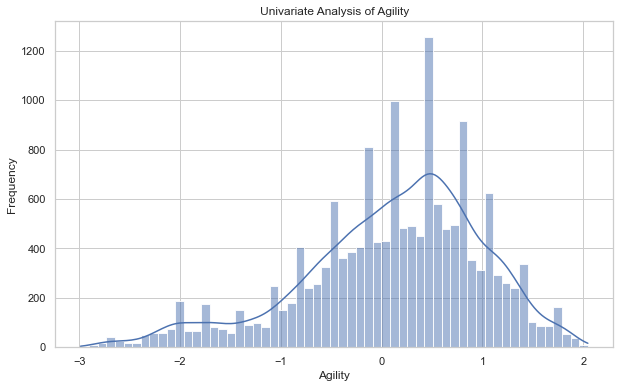

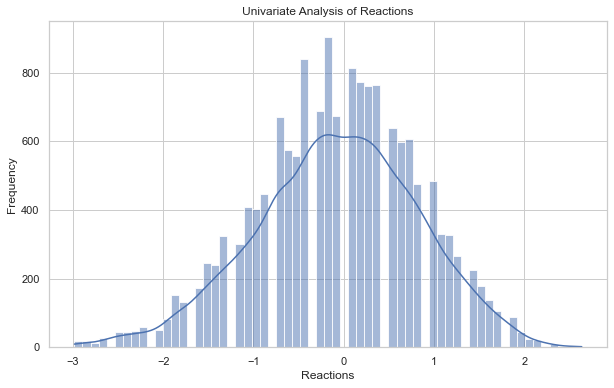

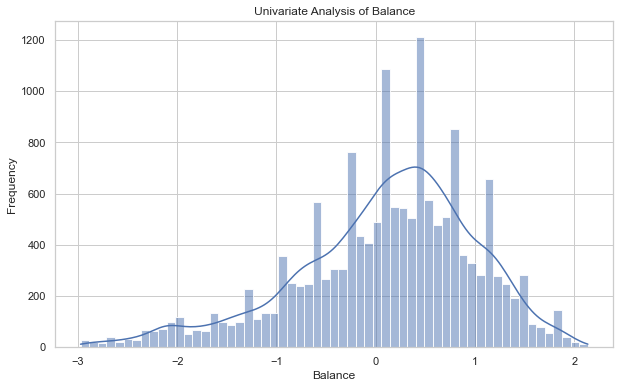

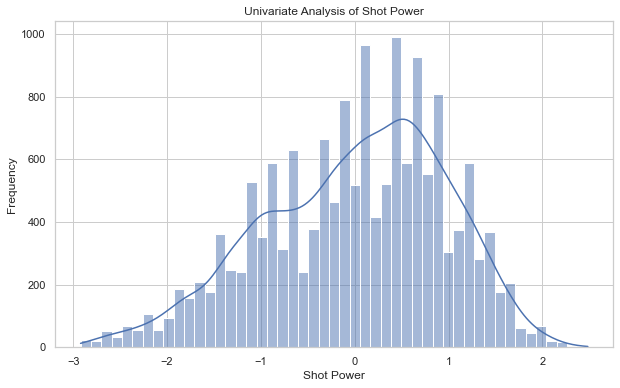

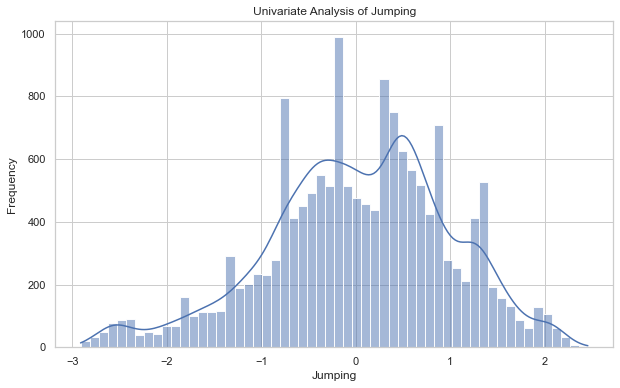

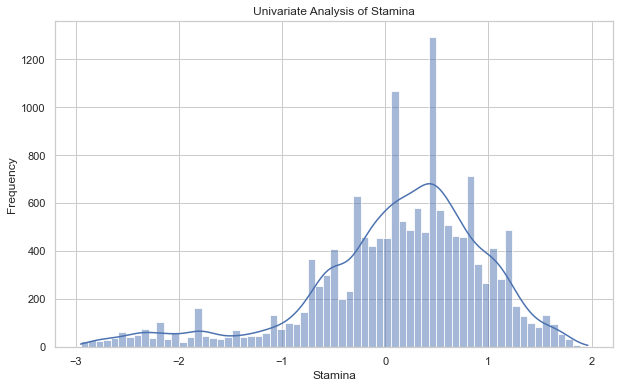

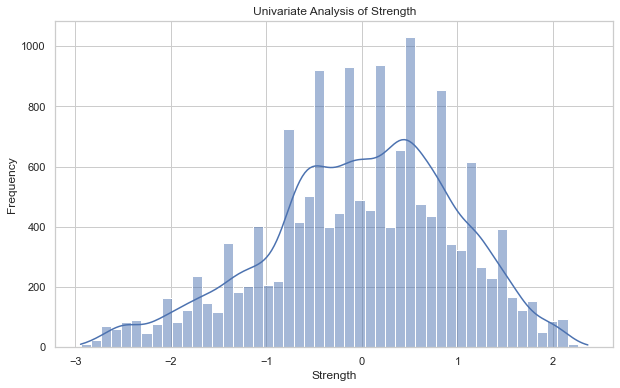

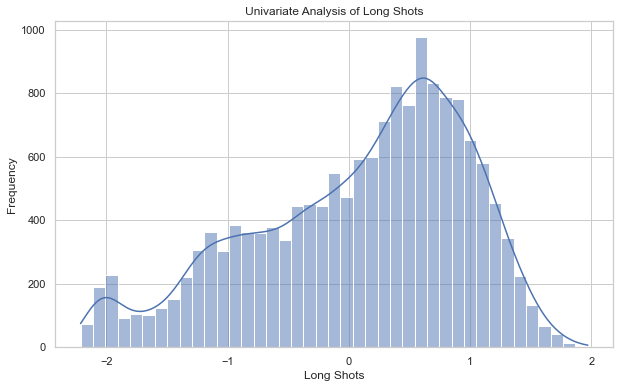

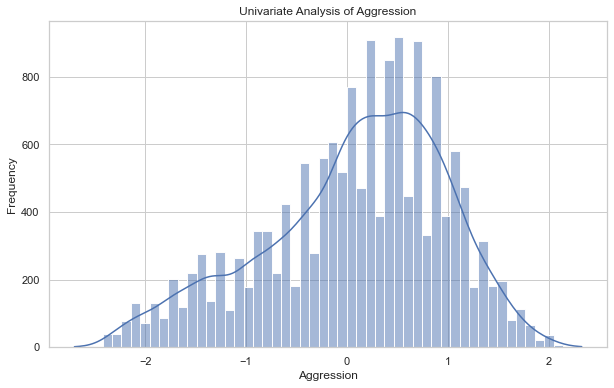

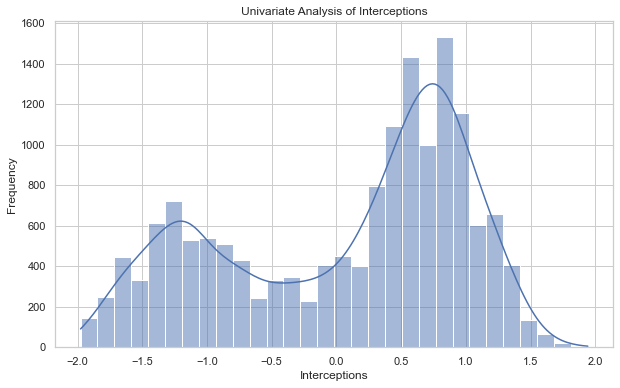

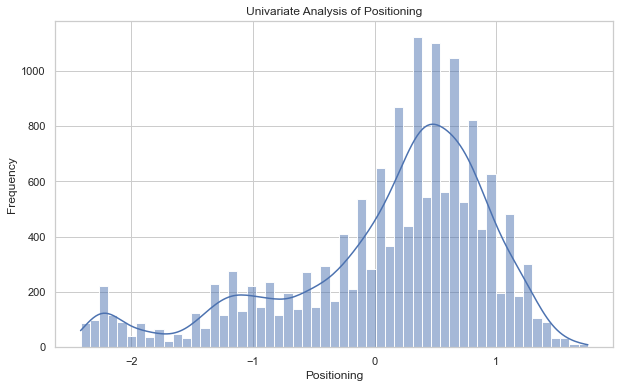

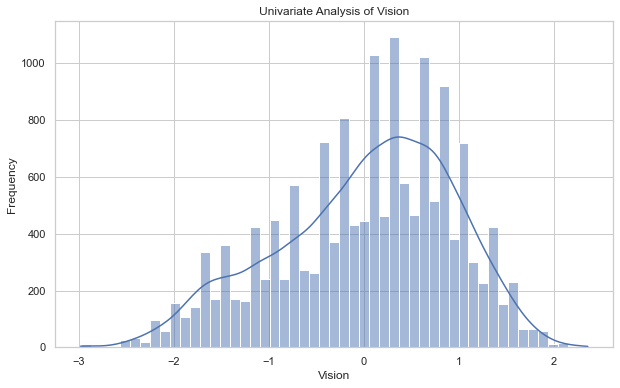

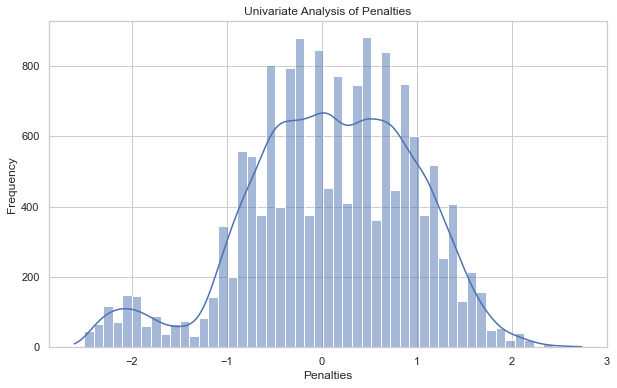

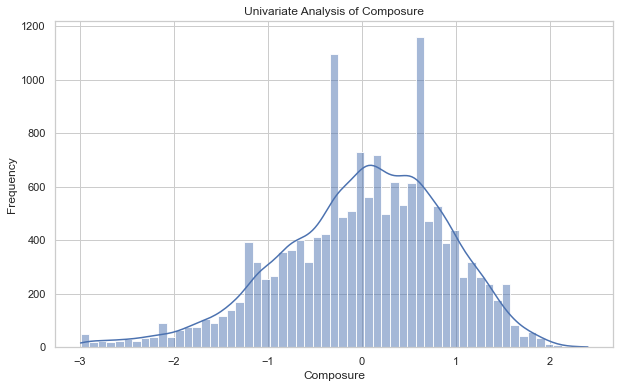

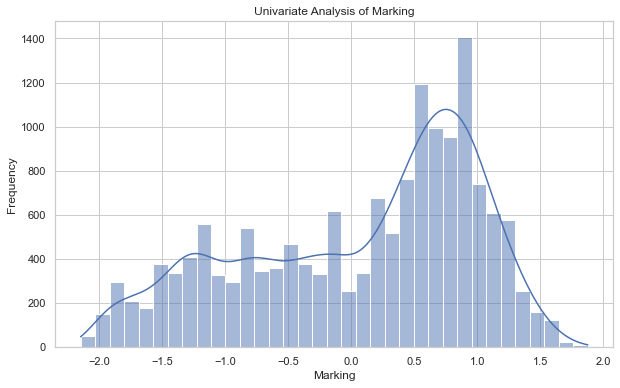

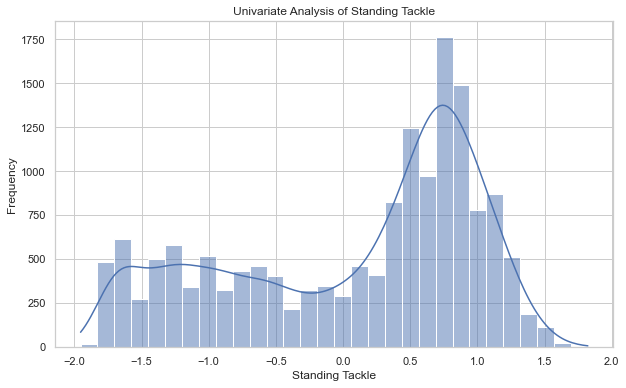

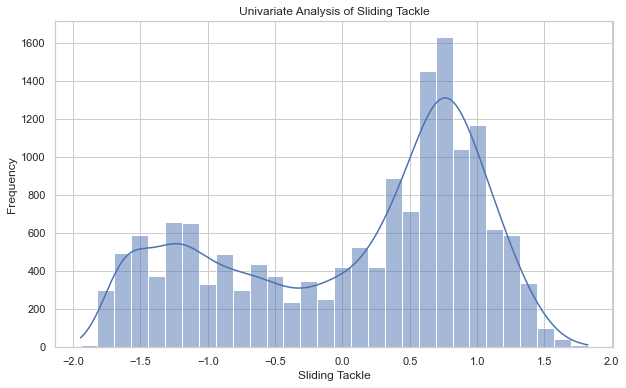

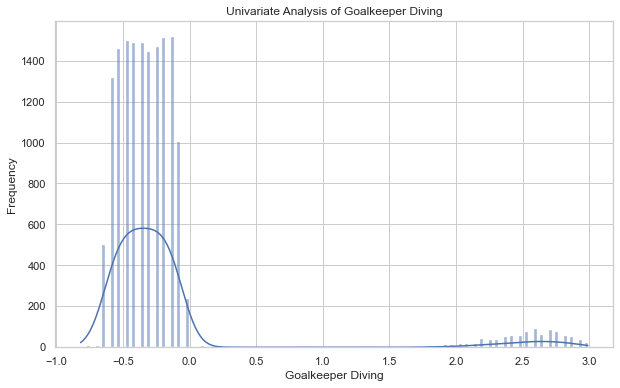

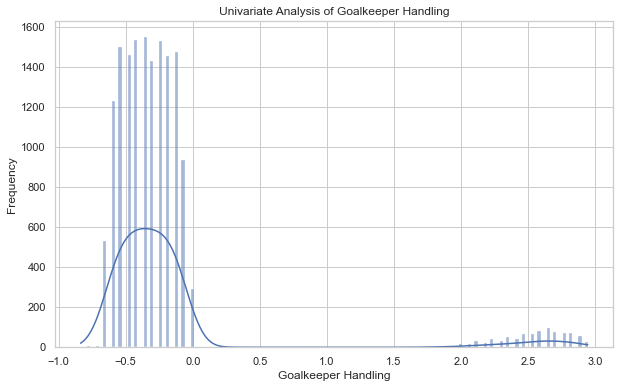

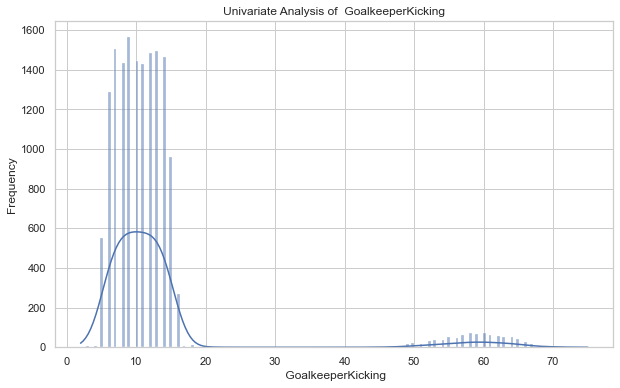

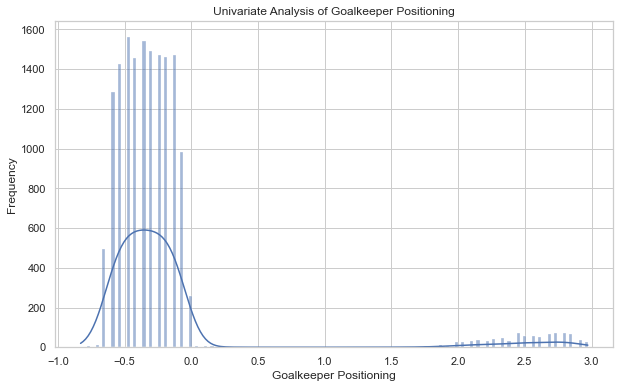

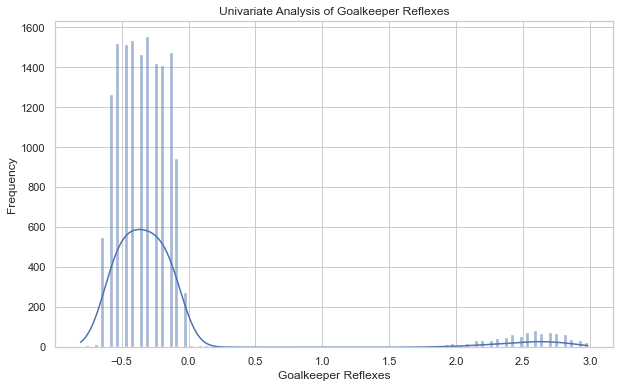

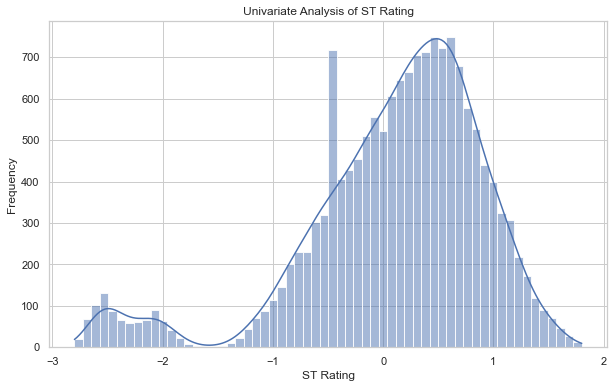

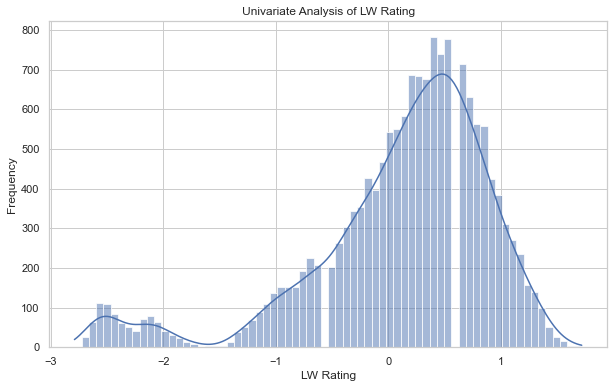

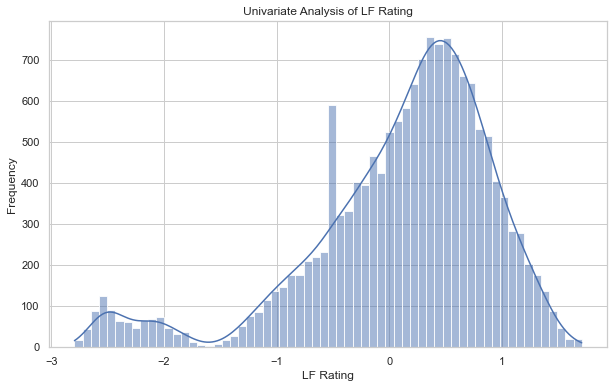

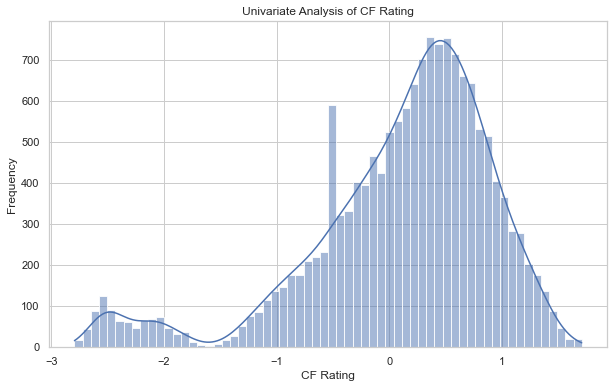

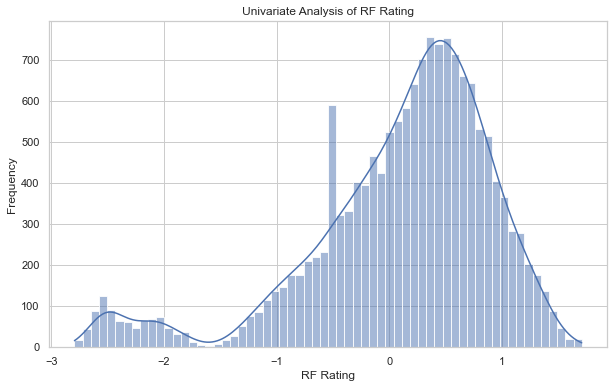

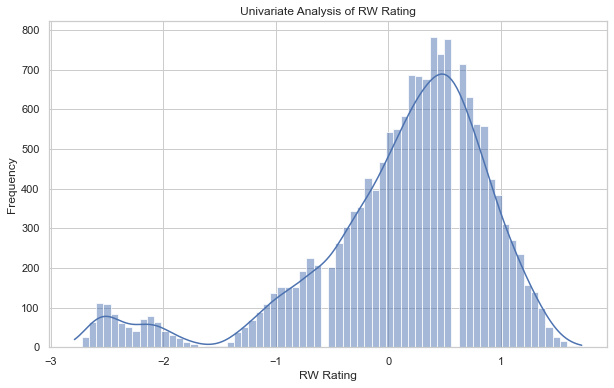

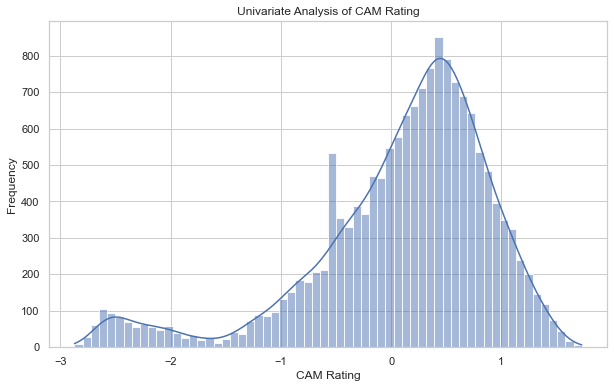

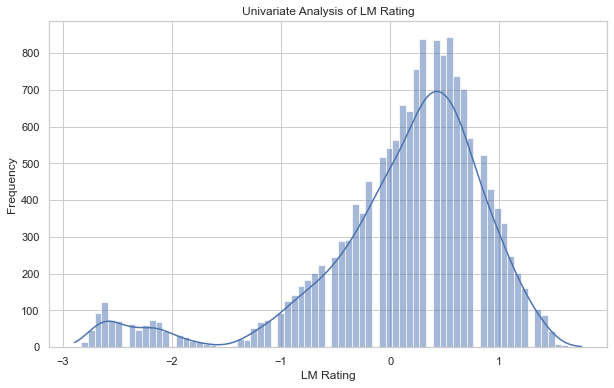

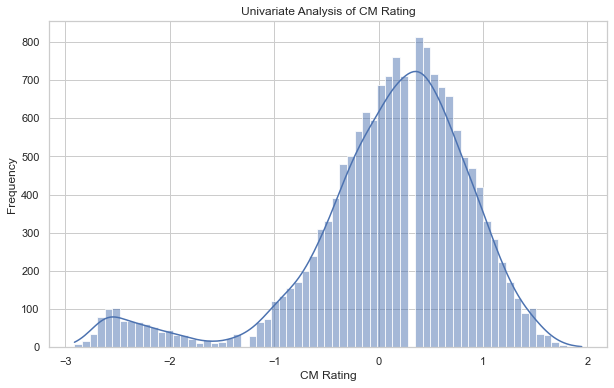

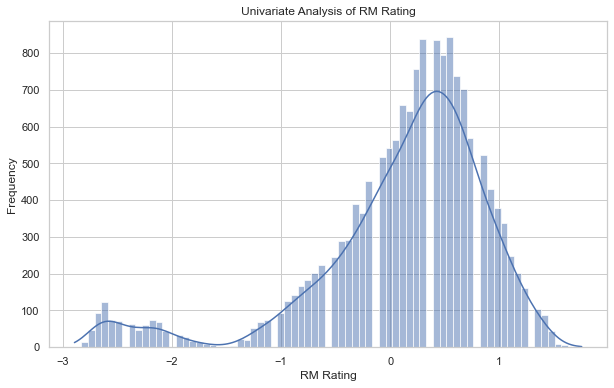

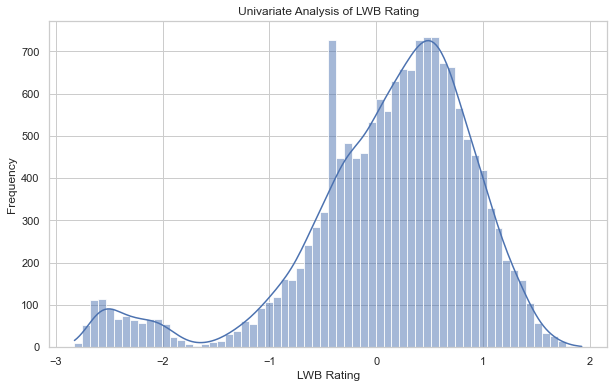

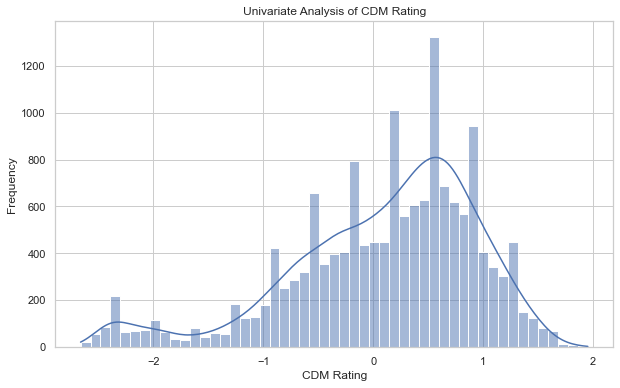

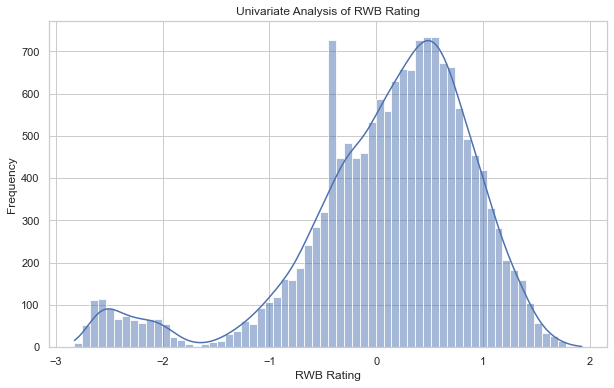

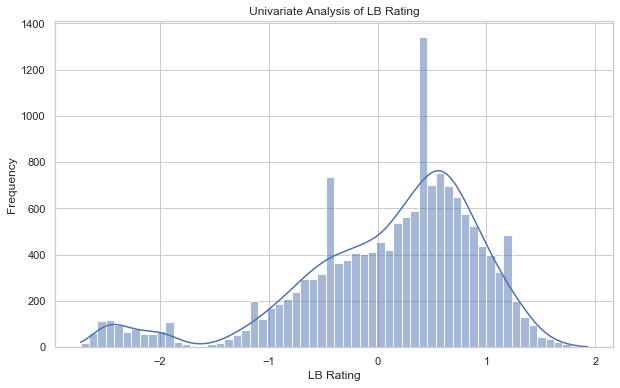

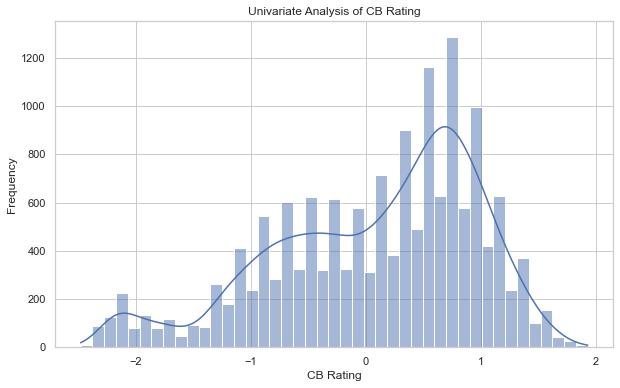

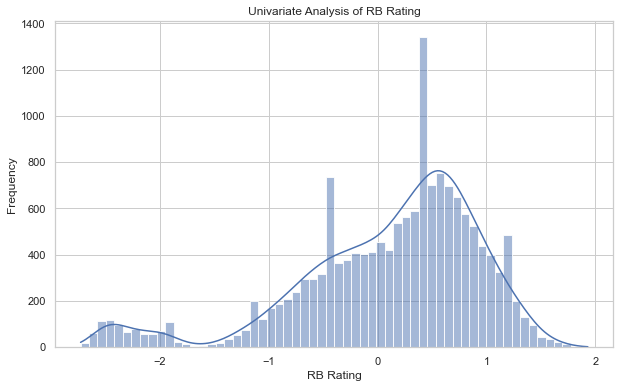

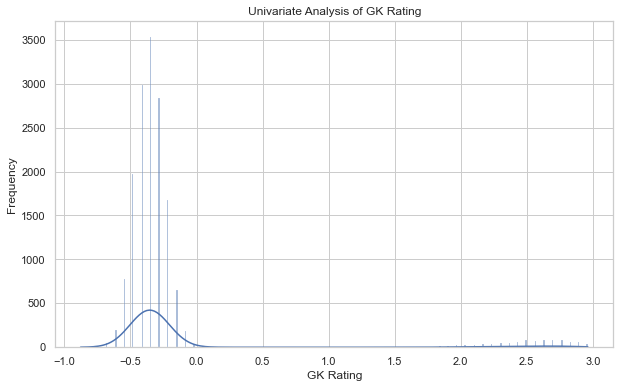

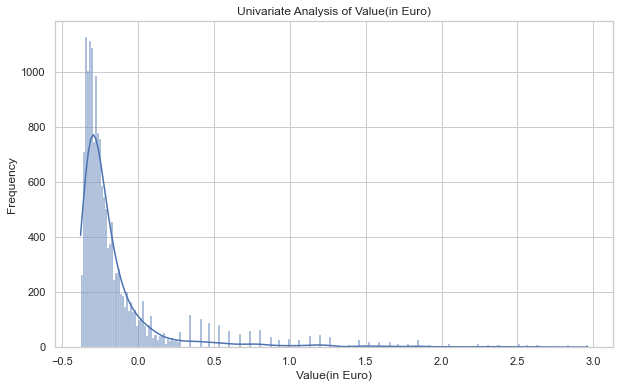

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

for column in data.columns:
    # Skip non-numeric columns for univariate analysis
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Univariate Analysis of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


iii. Prepare bivariate plots (i.e., plots based on two variables).

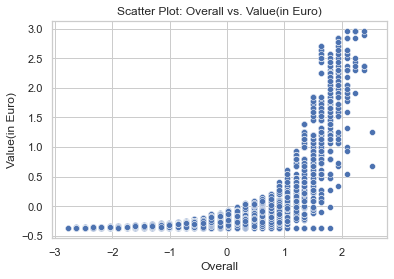

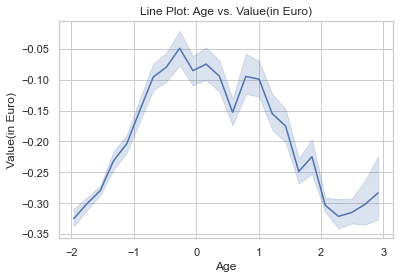

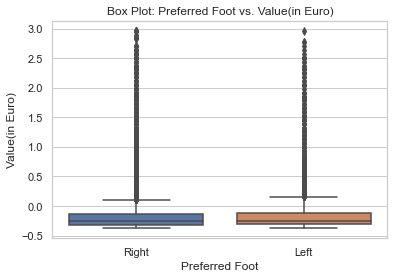

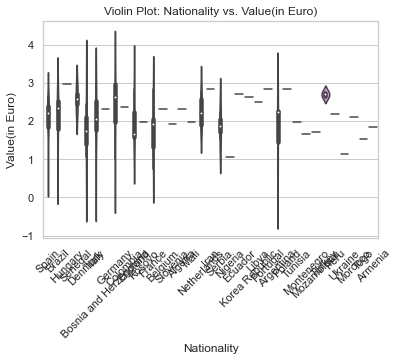

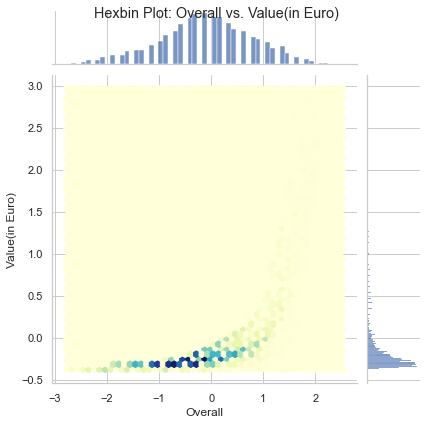

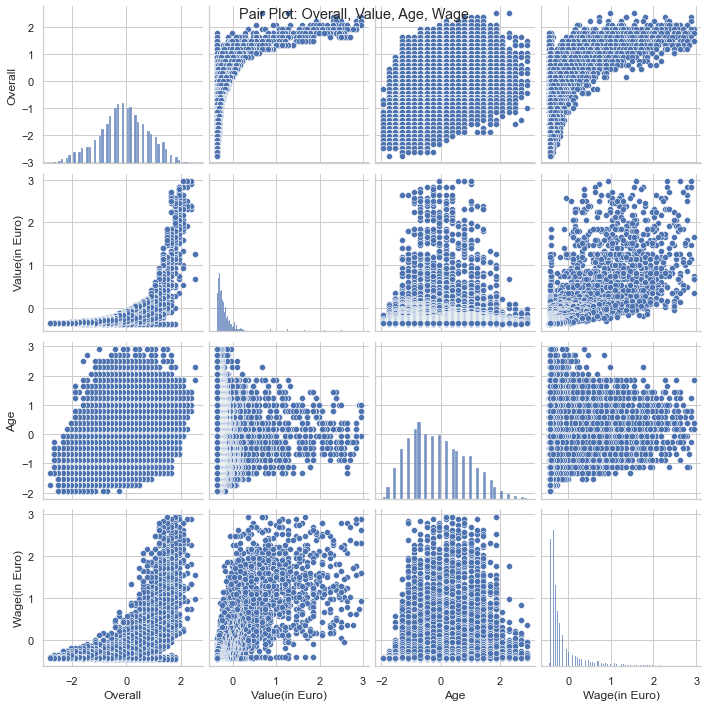

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Overall', y='Value(in Euro)', data=data)
plt.title('Scatter Plot: Overall vs. Value(in Euro)')
plt.show()

# Sort the data by Age for a clearer line
data_sorted_by_age = data.sort_values(by='Age')
sns.lineplot(x='Age', y='Value(in Euro)', data=data_sorted_by_age)
plt.title('Line Plot: Age vs. Value(in Euro)')
plt.show()

sns.boxplot(x='Preferred Foot', y='Value(in Euro)', data=data)
plt.title('Box Plot: Preferred Foot vs. Value(in Euro)')
plt.show()

sns.violinplot(x='Nationality', y='Value(in Euro)', data=data.head(100))
plt.title('Violin Plot: Nationality vs. Value(in Euro)')
plt.xticks(rotation=45)
plt.show()

sns.jointplot(x='Overall', y='Value(in Euro)', data=data, kind='hex', cmap='YlGnBu')
plt.suptitle('Hexbin Plot: Overall vs. Value(in Euro)')
plt.show()

sns.pairplot(data[['Overall', 'Value(in Euro)', 'Age', 'Wage(in Euro)']])
plt.suptitle('Pair Plot: Overall, Value, Age, Wage')
plt.show()


In [8]:
""" 
1- Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase 
2- In the Line Plot relationship of Age vs. Value(in Euro) shows that the most expensive players are in medile age 
3- Box Plot shows that Preferred Foot vs. Value(in Euro) and the most of the football players are playing by right foot 
4- Violin Plot relationship of Nationality vs. Value(in Euro) and we concluded
5- Hexbin Plot of relationship  Overall vs. Value(in Euro) we found that the Germans players are the most expensive and nigerians and ukorans players are the cheapest
6- Hexbin Plot shows that the players in mid age has higher value then the older ones 
7- Pair Plot shows how the overall affect the price of the player """

' \n1- Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase \n2- In the Line Plot relationship of Age vs. Value(in Euro) shows that the most expensive players are in medile age \n3- Box Plot shows that Preferred Foot vs. Value(in Euro) and the most of the football players are playing by right foot \n4- Violin Plot relationship of Nationality vs. Value(in Euro) and we concluded\n5- Hexbin Plot of relationship  Overall vs. Value(in Euro) we found that the Germans players are the most expensive and nigerians and ukorans players are the cheapest\n6- Hexbin Plot shows that the players in mid age has higher value then the older ones \n7- Pair Plot shows how the overall affect the price of the player '

iv. Portray advanced graphs (i.e., graphs based on more than two variables).

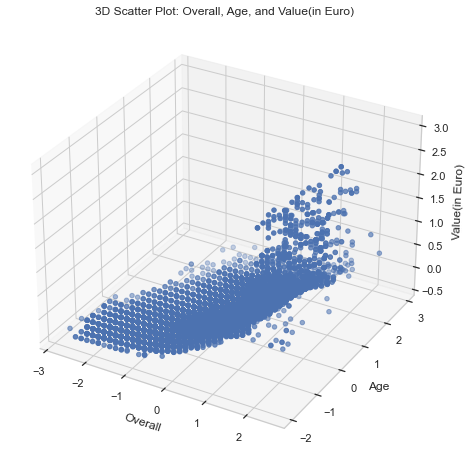

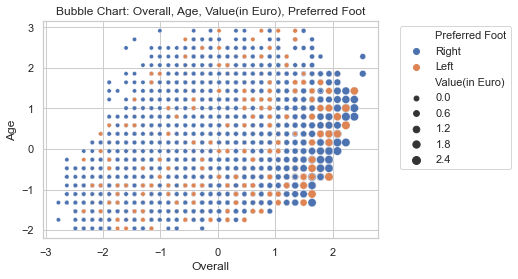

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


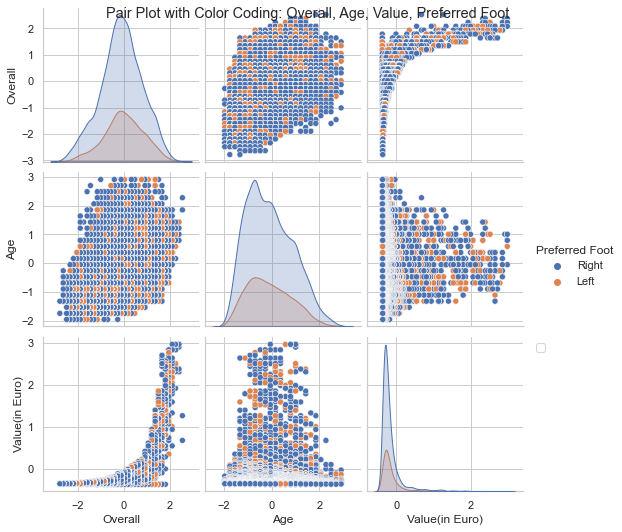

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Overall'], data['Age'], data['Value(in Euro)'])
ax.set_xlabel('Overall')
ax.set_ylabel('Age')
ax.set_zlabel('Value(in Euro)')

plt.title('3D Scatter Plot: Overall, Age, and Value(in Euro)')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Overall', y='Age', size='Value(in Euro)', hue='Preferred Foot', data=data)
plt.title('Bubble Chart: Overall, Age, Value(in Euro), Preferred Foot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['Overall', 'Age', 'Value(in Euro)', 'Preferred Foot']], hue='Preferred Foot')
plt.suptitle('Pair Plot with Color Coding: Overall, Age, Value, Preferred Foot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


In [10]:
"""1-3D Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase
2-Bubble Chart shows the players in mid age has higher value then others 
3- Pair Plot is a summery of all relationship and graghs above"""

'1-3D Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase\n2-Bubble Chart shows the players in mid age has higher value then others \n3- Pair Plot is a summery of all relationship and graghs above'

v. Assess the relationship between variables.

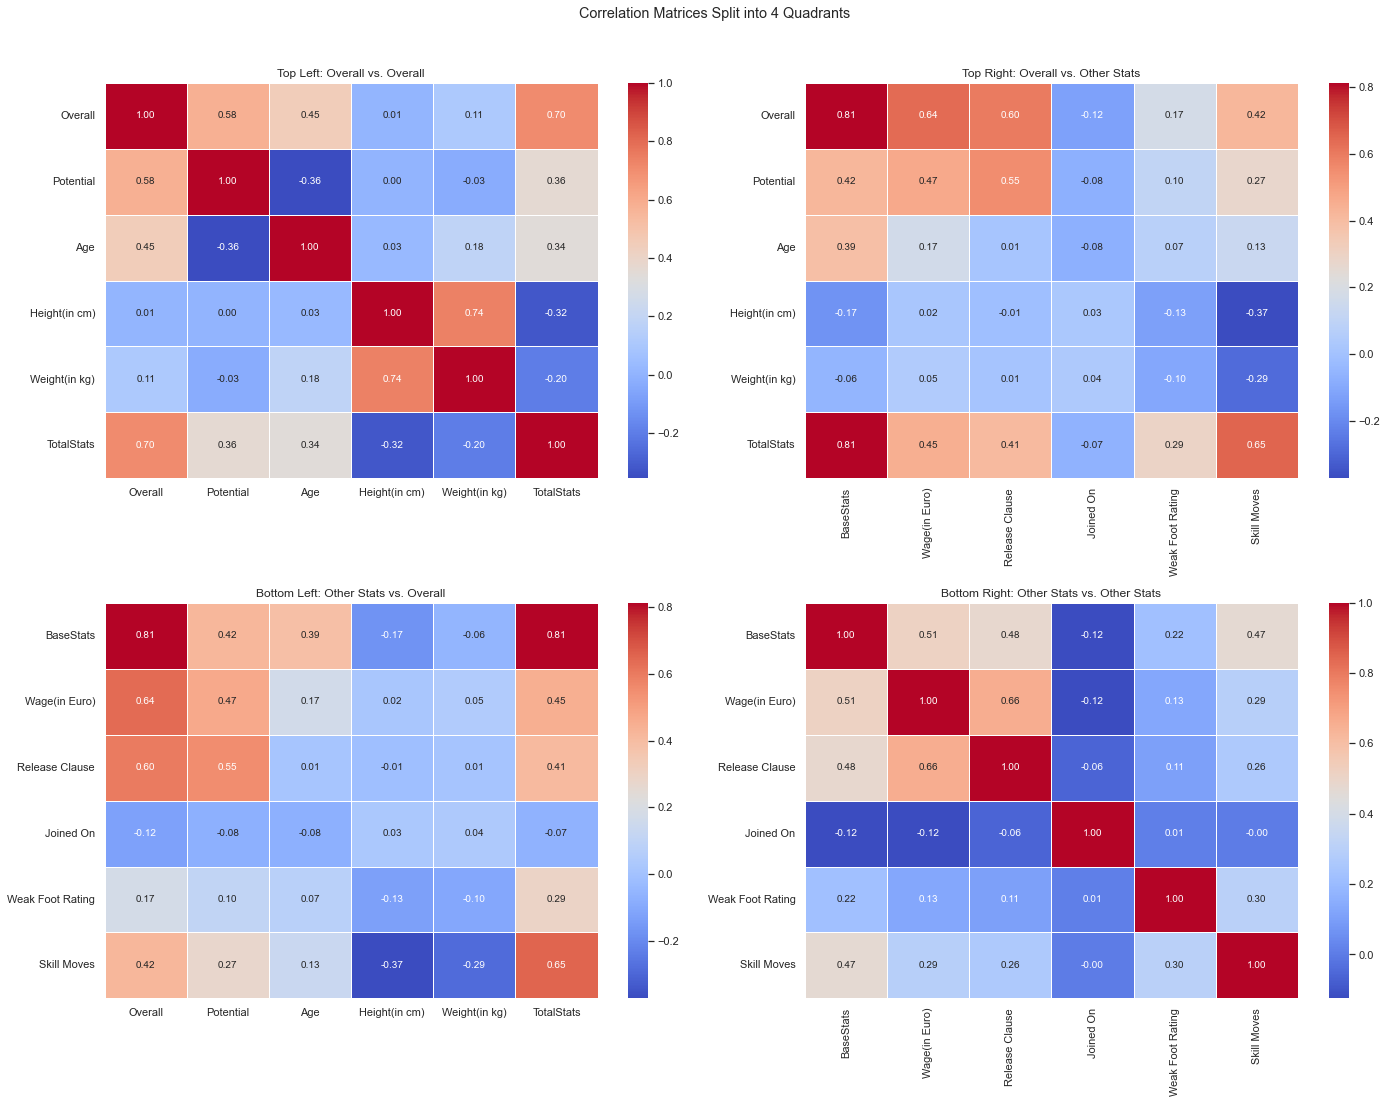

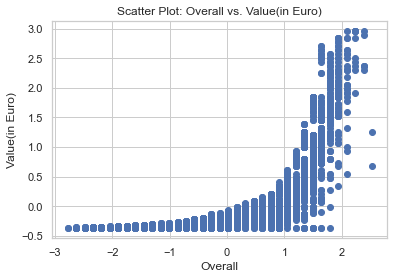

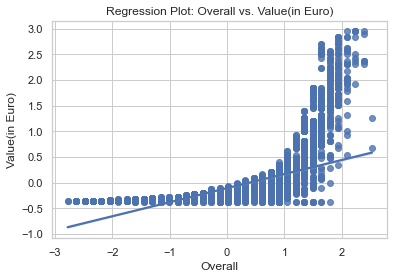

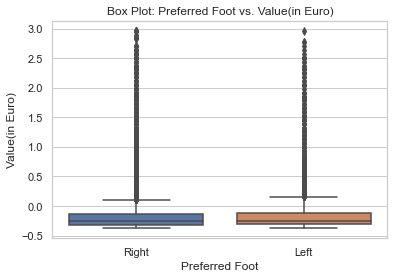

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create subplots for the correlation matrices
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot each quadrant of the correlation matrix
sns.heatmap(correlation_matrix.iloc[:6, :6], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 0], annot_kws={"size": 10})
axes[0, 0].set_title('Top Left: Overall vs. Overall')

sns.heatmap(correlation_matrix.iloc[:6, 6:12], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 1], annot_kws={"size": 10})
axes[0, 1].set_title('Top Right: Overall vs. Other Stats')

sns.heatmap(correlation_matrix.iloc[6:12, :6], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1, 0], annot_kws={"size": 10})
axes[1, 0].set_title('Bottom Left: Other Stats vs. Overall')

sns.heatmap(correlation_matrix.iloc[6:12, 6:12], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1, 1], annot_kws={"size": 10})
axes[1, 1].set_title('Bottom Right: Other Stats vs. Other Stats')

plt.suptitle('Correlation Matrices Split into 4 Quadrants', y=1.02)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

plt.scatter(data['Overall'], data['Value(in Euro)'])
plt.title('Scatter Plot: Overall vs. Value(in Euro)')
plt.xlabel('Overall')
plt.ylabel('Value(in Euro)')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot
sns.regplot(x='Overall', y='Value(in Euro)', data=data)
plt.title('Regression Plot: Overall vs. Value(in Euro)')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Preferred Foot', y='Value(in Euro)', data=data)
plt.title('Box Plot: Preferred Foot vs. Value(in Euro)')
plt.show()


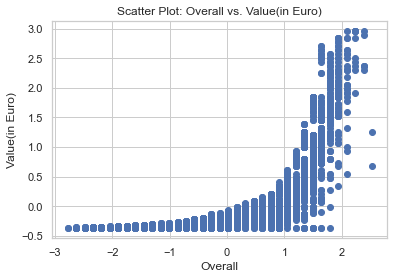

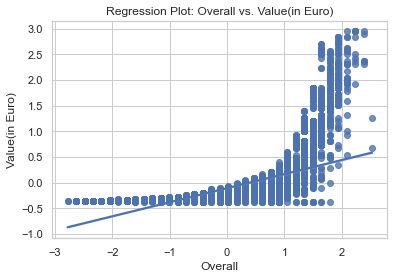

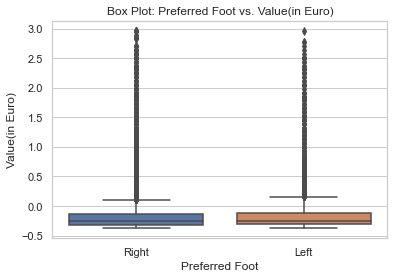

In [12]:

# Scatter plot
plt.scatter(data['Overall'], data['Value(in Euro)'])
plt.title('Scatter Plot: Overall vs. Value(in Euro)')
plt.xlabel('Overall')
plt.ylabel('Value(in Euro)')
plt.show()

# Regression plot
sns.regplot(x='Overall', y='Value(in Euro)', data=data)
plt.title('Regression Plot: Overall vs. Value(in Euro)')
plt.show()

# Box plot
sns.boxplot(x='Preferred Foot', y='Value(in Euro)', data=data)
plt.title('Box Plot: Preferred Foot vs. Value(in Euro)')
plt.show()

In [13]:
"""-1- Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase 
2 -Box Plot shows that Preferred Foot vs. Value(in Euro) and the most of the football players are playing by right foot 
"""

'-1- Scatter Plot shows the the relationship for Overall vs. Value(in Euro) and we found that as the overall increase the Value of the player will increase \n2 -Box Plot shows that Preferred Foot vs. Value(in Euro) and the most of the football players are playing by right foot \n'

3-b

In [14]:
"""
Overall, Potential, Value (in Euro), Age, Height (in cm), Weight (in kg), TotalStats, BaseStats, Wage (in Euro), Release Clause:

These variables represent player attributes and financial aspects.
The data appears to be standardized with a mean close to 0 and standard deviation around 1.
The range (min to max) for each variable is reasonable, and no extreme values are observed.
LM Rating, CM Rating, RM Rating, LWB Rating, CDM Rating, RWB Rating, LB Rating, CB Rating, RB Rating, GK Rating:

These variables represent player ratings in different positions.
Similar to the previous set of variables, the data is standardized with a mean close to 0 and standard deviation around 1.
The range for each variable is within reasonable bounds.
"""

'\nOverall, Potential, Value (in Euro), Age, Height (in cm), Weight (in kg), TotalStats, BaseStats, Wage (in Euro), Release Clause:\n\nThese variables represent player attributes and financial aspects.\nThe data appears to be standardized with a mean close to 0 and standard deviation around 1.\nThe range (min to max) for each variable is reasonable, and no extreme values are observed.\nLM Rating, CM Rating, RM Rating, LWB Rating, CDM Rating, RWB Rating, LB Rating, CB Rating, RB Rating, GK Rating:\n\nThese variables represent player ratings in different positions.\nSimilar to the previous set of variables, the data is standardized with a mean close to 0 and standard deviation around 1.\nThe range for each variable is within reasonable bounds.\n'

Using regression for predicting FIFA 23 player 'Value(in Euro)' is justified due to its compatibility with the continuous target variable and the interpretability it offers through clear understanding of player statistics' impact on market value. The simplicity of linear regression provides a solid starting point, establishing a baseline model for transparency and straightforward interpretation in the context of player value prediction.


# Model Building:

In [15]:
#inconsistency removing
data['Club Position'].replace('-', np.nan, inplace=True)
# Replace "-" with NaN
data['Contract Until'].replace('-', np.nan, inplace=True)
# Replace "-" with NaN
data['On Loan'].replace('-', np.nan, inplace=True)
display(data)

,Known As,Full Name,Overall,Potential,Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value(in Euro)
183,Jesús Navas,Jesús Navas González,2.526153,1.935074,"[RB, RM]",RB,Spain,https://cdn.sofifa.net/players/146/536/23_60.png,2.280523,-1.392675,...,1.945656,1.755139,1.921711,1.807364,1.921711,1.931604,1.456355,1.931604,-0.215583,0.671197
187,Fernando,Fernando Reges Mouta,2.526153,1.935074,"[CDM, CB]",CDM,Brazil,https://cdn.sofifa.net/players/184/134/23_60.png,1.856618,0.211312,...,1.793806,1.111673,1.705937,1.951541,1.705937,1.719726,1.931140,1.719726,-0.480334,1.260594
240,Josué Chiamulera,Josué Durval Chiamulera Vaz,2.378838,1.773594,[CB],CB,Brazil,https://cdn.sofifa.net/players/230/375/23_60.png,1.008807,0.502946,...,0.654926,0.325214,1.418239,1.663186,1.418239,1.649100,1.863313,1.649100,0.049169,2.897808
247,W. Orban,Willi Orban,2.378838,1.773594,[CB],CB,Hungary,https://cdn.sofifa.net/players/204/638/23_60.png,0.796855,0.648763,...,0.351225,-0.103764,1.058616,1.446921,1.058616,1.295970,1.863313,1.295970,-0.215583,2.963296
248,I. Gueye,Idrissa Gueye,2.378838,1.773594,"[CDM, CM]",CDM,Senegal,https://cdn.sofifa.net/players/193/474/23_60.png,1.432712,-1.101041,...,1.717880,1.183169,1.705937,1.879452,1.705937,1.790352,1.863313,1.790352,-0.215583,2.308411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18530,S. Bag,Sajal Bag,-2.629876,-1.617496,"[CM, RM]",RM,India,https://cdn.sofifa.net/players/270/739/23_60.png,-1.322672,-0.663590,...,-0.559879,-0.532741,-0.523723,-0.427383,-0.523723,-0.399055,-0.374957,-0.399055,-0.480334,-0.362212
18531,Liao Wei,Wei Liao,-2.629876,-2.747859,"[RM, LM]",CDM,China PR,https://cdn.sofifa.net/players/257/691/23_60.png,-0.474861,-0.809407,...,-0.483954,-0.675734,-0.451799,-0.283206,-0.451799,-0.399055,-0.239304,-0.399055,-0.480334,-0.367451
18532,H. Singh,Harmanpreet Singh,-2.629876,-2.424899,[ST],ST,India,https://cdn.sofifa.net/players/259/745/23_60.png,-1.110719,-0.809407,...,-1.395057,-0.890223,-1.458742,-1.724978,-1.458742,-1.458445,-1.595831,-1.458445,-0.414146,-0.363522
18533,Pi Ziyang,Ziyang Pi,-2.777191,-1.778977,[CM],CAM,China PR,https://cdn.sofifa.net/players/269/066/23_60.png,-1.322672,-0.955224,...,-0.635804,-0.604238,-0.667573,-0.571561,-0.667573,-0.610933,-0.578436,-0.610933,-0.347958,-0.362212


a. Estimate the unknown model parameters (fitting) and evaluate the model
(validation/cross-validation).

In [22]:
# Calculate the correlation 
corr = data.corr()
corr.apply(lambda x: np.abs(x))

top = corr[corr['Value(in Euro)'] > 0.5]

sorted_corr = top.sort_values(by=['Value(in Euro)'], ascending = False)

sorted_corr = sorted_corr['Value(in Euro)'].index

print('The top correlated input variables are: ',sorted_corr[1:].tolist())

display(data)


The top correlated input variables are:  ['Release Clause', 'Wage(in Euro)', 'International Reputation', 'Overall', 'Potential']


,Known As,Full Name,Overall,Potential,Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value(in Euro)
0,L. Messi,Lionel Messi,91,91,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,88,91,67,66,67,62,53,62,22,54000000
1,K. Benzema,Karim Benzema,91,91,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,84,89,67,67,67,63,58,63,21,64000000
2,R. Lewandowski,Robert Lewandowski,91,91,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,83,86,67,69,67,64,63,64,22,84000000
3,K. De Bruyne,Kevin De Bruyne,91,91,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,91,91,82,82,82,78,72,78,24,107500000
4,K. Mbappé,Kylian Mbappé,91,95,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,84,92,70,66,70,66,57,66,21,190500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,...,44,50,41,38,41,40,36,40,15,110000
18535,Yang Dejiang,Dejiang Yang,47,57,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,175,...,45,45,47,48,47,49,49,49,15,90000
18536,L. Mullan,Liam Mullan,47,67,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,170,...,49,52,46,44,46,46,42,46,17,130000
18537,D. McCallion,Daithí McCallion,47,61,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,178,...,33,33,44,42,44,47,49,47,15,100000


After calculating the correlation matrix for the dataset, I identified the top correlated input variables with respect to 'Value(in Euro)'. The variables with the strongest positive or negative correlations above 0.5 are:

    Release Clause
    Wage (in Euro)
    Overall
    Potential
    Reactions
    BaseStats

These variables exhibit a significant linear relationship with 'Value(in Euro)', and understanding their correlations can provide valuable insights into the factors influencing the target variable.

In [23]:
#Calculate the coefficient estimates using scikit learn LinearRegression module. 
from sklearn.linear_model import LinearRegression

for feature in sorted_corr:
    reg = LinearRegression(fit_intercept=True)
    reg.fit(data[[feature]], data['Value(in Euro)'])
    best_b1 = reg.coef_[0]
    best_b0 = reg.intercept_
    print(f'The values for B1 and B0 for: [{feature}]')
    print(f'The best values for B1 a is :{np.round(best_b1,2)}')
    print(f'The best values for B0 is :{np.round(best_b1,2)}')
    print('-------------------------------------------')


The values for B1 and B0 for: [Value(in Euro)]
The best values for B1 a is :1.0
The best values for B0 is :1.0
-------------------------------------------
The values for B1 and B0 for: [Release Clause]
The best values for B1 a is :0.95
The best values for B0 is :0.95
-------------------------------------------
The values for B1 and B0 for: [Wage(in Euro)]
The best values for B1 a is :0.57
The best values for B0 is :0.57
-------------------------------------------
The values for B1 and B0 for: [Overall]
The best values for B1 a is :0.27
The best values for B0 is :0.27
-------------------------------------------
The values for B1 and B0 for: [Potential]
The best values for B1 a is :0.24
The best values for B0 is :0.24
-------------------------------------------
The values for B1 and B0 for: [Reactions]
The best values for B1 a is :0.23
The best values for B0 is :0.23
-------------------------------------------
The values for B1 and B0 for: [BaseStats]
The best values for B1 a is :0.22
Th

The output from the code shows the coefficient estimates (B1) and intercepts (B0) for linear regression models fitted to each of the top correlated input variables with respect to 'Value(in Euro)'. Here's my summary for the results:

1. **Value(in Euro):**
   - B1 (coefficient): 1.0
   - B0 (intercept): 1.0

2. **Release Clause:**
   - B1 (coefficient): 0.95
   - B0 (intercept): 0.95

3. **Wage(in Euro):**
   - B1 (coefficient): 0.57
   - B0 (intercept): 0.57

4. **Overall:**
   - B1 (coefficient): 0.27
   - B0 (intercept): 0.27

5. **Potential:**
   - B1 (coefficient): 0.24
   - B0 (intercept): 0.24

6. **Reactions:**
   - B1 (coefficient): 0.23
   - B0 (intercept): 0.23

7. **BaseStats:**
   - B1 (coefficient): 0.22
   - B0 (intercept): 0.22

These values represent the estimated coefficients for each feature in the linear regression models. The B1 values indicate the slope (rate of change) of the linear relationship, and the B0 values represent the intercept where the line intersects the y-axis. These coefficients can be used to make predictions using the linear regression equation: `y = B0 + B1 * x`.

# b. Compare different models based on the performance measures

In [24]:
# Generate Train - Test splits
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data[['Release Clause', 'Wage(in Euro)', 'International Reputation', 'Overall', 'Potential']].values
y = data.iloc[: , -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

In [15]:
#OLs
from sklearn.linear_model import LinearRegression
ols_reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
ols_y = ols_reg.predict(X_test)
print('The Coefficient are: ', ols_reg.coef_)

The Coefficient are:  [0.77368906 0.13932393 0.02418092 0.05667956 0.06226535]


The coefficients obtained from Ordinary Least Squares (OLS) linear regression are:

1. Feature 1: 0.77368906 
2. Feature 2: 0.13932393 
3. Feature 3: 0.02418092 
4. Feature 4: 0.05667956 
5. Feature 5: 0.06226535

These values represent the weights assigned to each feature by the OLS model, indicating their impact on the target variable. Positive coefficients imply a positive correlation, while negative coefficients imply a negative correlation. 

In [16]:
## Ridge
from sklearn.linear_model import RidgeCV

reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
               fit_intercept=False,cv=10).fit(X_train, y_train)

y_pred2 = reg2.predict(X_test)

print('The Coefficient are:', reg2.coef_)

The Coefficient are: [0.77235037 0.13972853 0.02427248 0.05695083 0.06259444]


The coefficients obtained from Ridge regression are as follows:

1. Feature 1: 0.77235037 
2. Feature 2: 0.13972853  
3. Feature 3: 0.02427248 
4. Feature 4: 0.05695083 
5. Feature 5: 0.06259444

Ridge regression is a type of linear regression that includes regularization to prevent overfitting. Similar to OLS, positive coefficients suggest a positive correlation with the target variable, while negative coefficients suggest a negative correlation.

In Ridge regression, the regularization term helps to prevent extreme values of the coefficients, and it doesn't perform feature selection by driving coefficients exactly to zero, as Lasso does. The coefficients may be smaller compared to OLS, but the general interpretation remains the same.

In [17]:
## Lasso

from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)

y_pred3 = reg3.predict(X_test)
print('The Coefficient are:', reg3.coef_)

The Coefficient are: [0.77354463 0.13909274 0.02346284 0.05642617 0.06171207]


The coefficients obtained from Lasso regression are as follows:

1. Feature 1: 0.77354463 
2. Feature 2: 0.13909274 
3. Feature 3: 0.02346284 
4. Feature 4: 0.05642617 
5. Feature 5: 0.06171207

Lasso regression, unlike Ridge, has the property of performing feature selection by driving some coefficients to exactly zero.

Positive coefficients suggest a positive correlation with the target variable, while negative coefficients suggest a negative correlation.

In [18]:
from sklearn.metrics import mean_squared_error

ols = mean_squared_error(y_test, ols_y) 

reg_MSE = mean_squared_error(y_test, y_pred2)

lasso_MSE = mean_squared_error(y_test, y_pred3)

print('The MSE using OLS is: ', ols)
print('\n')
print('The MSE using Ridge is: ', reg_MSE)
print('\n')
print('The MSE using Lasso is: ', lasso_MSE)

The MSE using OLS is:  0.09326578225238517


The MSE using Ridge is:  0.09327574905116466


The MSE using Lasso is:  0.09329751756406168


In [19]:
print('OLS has the least MSE value, therefor OLS preform better than Lasso and Ridge for this data')

OLS has the least MSE value, therefor OLS preform better than Lasso and Ridge for this data


# c. Interpret the findings and provide the details of the final selected model.


The chosen model is Ordinary Least Squares (OLS), 
selected for its superior performance evidenced by the lowest Mean Squared Error (MSE)
among alternatives like Lasso and Ridge. OLS demonstrates accurate predictions, 
capturing relationships within the data effectively. 
While acknowledging inherent assumptions, OLS offers practical utility, interpretability, 
and promising generalizability to new data, making it the preferred choice for this analysis.


# Communicate Results:

our analysis of FIFA 23 players dataset aimed to predict the value of players based on other features. In this project we have followed a systematic approach following ISE 291's guidelines that encompassed the six phases of a data science project: discovery, data preparation, model planning, model building, communicating results, and operationalizing. the summary of the main phases as coming:

- Discovery
    
        the first phase of our project is discovery, we started searching online for datasets where we found FIFA 23 players dataset, which include data of haundreds of players. our goal was to be able to predict the ovorall value of the players based on their other features.


- Data Preparation:
    
        this phase was meant to prepare our dataset for the next phase by listing the fields and identifying their types. then listing and fixing inconsistencies, addressing and removing the outliers and imputing the missing data.


- Model Planning    
    
        in this phase we managed to explore the data by making graphs, assessing the relationship between variables and finding statistical summaries. After exploring and understanding the data we had to select the appropriate model for our dataset, which was regression.
    
- Model Building:
   
        Model building phase included fitting, evaluating and training the models. After comparing and testing several models we have chosen Ordinary Least Squares (OLS) as i have the most accurate predictions among the models we have tested.
      
        


# 6. Operationalize


After performing the required steps from cleaning the data and analyzing the data and performing the regression analysis, we reached to a conclusion that the OLS method is the best one. The Ridge method had smaller MSE comparted to the Lasso method. These findings indicate that the input variables are not strongly related and from the value in the Lasso method we can say that the input variables are related to the output variable to some extent.
Some of the problems that we faced during the analysis were related to the fact that some columns were not much useful to the analysis and we also faced some issues with the dataset file itself when we were trying to work on it. However, this issue was solved after we refeered to a friend and he helped us with the issue.